# Capstone Webscrapping using BeautifulSoup - Data Kurs US Dollar ke Indonesia Rupiah 

## Background

Pada projek capstone ini saya melakukan web scrapping data kurs dollar (USD) ke rupiah (IDR) dari exchange-rates.org website. Exchange-rate.org merupakan website yang memungkinkan kita untuk melihat nilai tukar mata uang asing dengan data terbaru, akurat dan disediakan oleh para ahli finansial. Data yang dilakukan scrapping melalui website tersebut bertujuan untuk pembelajaran.

Dilakukannya web scrapping pada nilai mata uang asing dollar ke rupiah dapat dimanfaatkan untuk berbagai keperluan seperti visualisasi data, melakukan prediksi pergerakan mata uang asing rupiah terhadap dollar di periode selanjutnya, mendapatkan insight terkait informasi atau trend pergerakan mata uang rupiah terhadap dollar, dan sebagainya. Oleh karena itu, penting untuk dilakukan web scrapping agar mendapatkan data yang diperlukan.

Fokusan scrapping saya pada website ini hanya kepada kurs rupiah terhadap dollar beserta tanggalnya. Dimana pada data kurs rupiah terhadap dollar menampilkan nilai IDR per 1 USD. Dimana data yang dilakukan scrapping yaitu selama periode bulan oktober 2022 hingga april 2023.

## Requesting the Data and Creating a BeautifulSoup

Pertama, saya perlu melakukan request web dari situs exchange-rates.org dengan metode `get`

In [52]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

In [53]:
url = 'https://www.exchange-rates.org/exchange-rate-history/usd-idr'
response = requests.get(url)

Kemudian saya melakukan visualisasi yang didapatkan melalui metode `request.get` menggunakan `.content`, dan dilakukan pengirisan agar konten terlihat rapi, Berikut hasilnya:

In [54]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

Selanjutnya menggunakan beautifulsoup saya ingin mendapatkan beautifulsoup objek, sehingga dari konten html yang terlihat abstrak dan tidak terstruktur sebelumnya dapat diubah menjadi python objek yang jelas

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [56]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Berikut merupakan hasil dari beautifulsoup. Dimana kontennya mirip seperti `get_url` objek namun lebih rapi. Kemudian dilakukan slicing secukupnya, hingga 500 kata saja yang ditampilkan.

In [57]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Selanjutnya untuk melakukan scrapping dari data kurs rupiah terhadap dolar perlu dilakukan pencarian kata kunci pada web dari data yang ingin saya ambil. Namun sebelumnya berikut merupakan tampilan dari halaman web exchange-rates.org

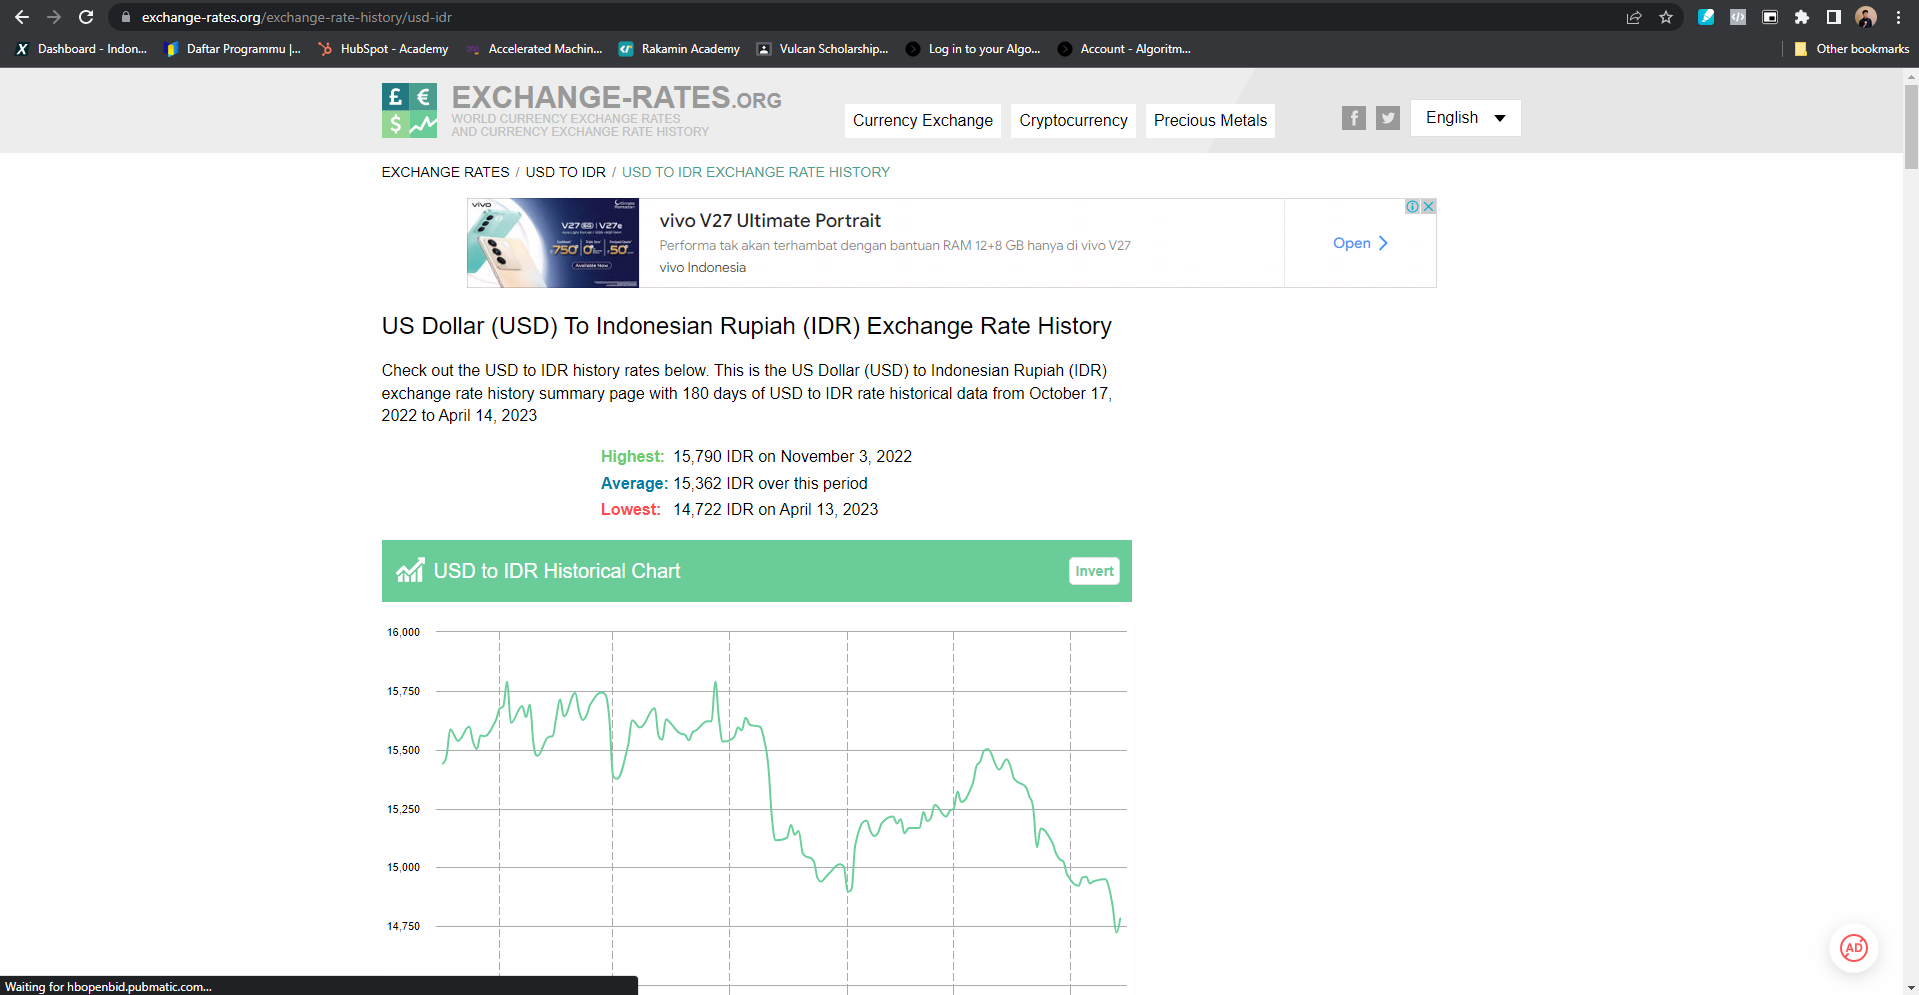

Selanjutnya dilakukan inspect elemen agar dapat mencari kata kunci yang diperlukan untuk scrapping data yang dibutuhkan. berikut tampilannya 

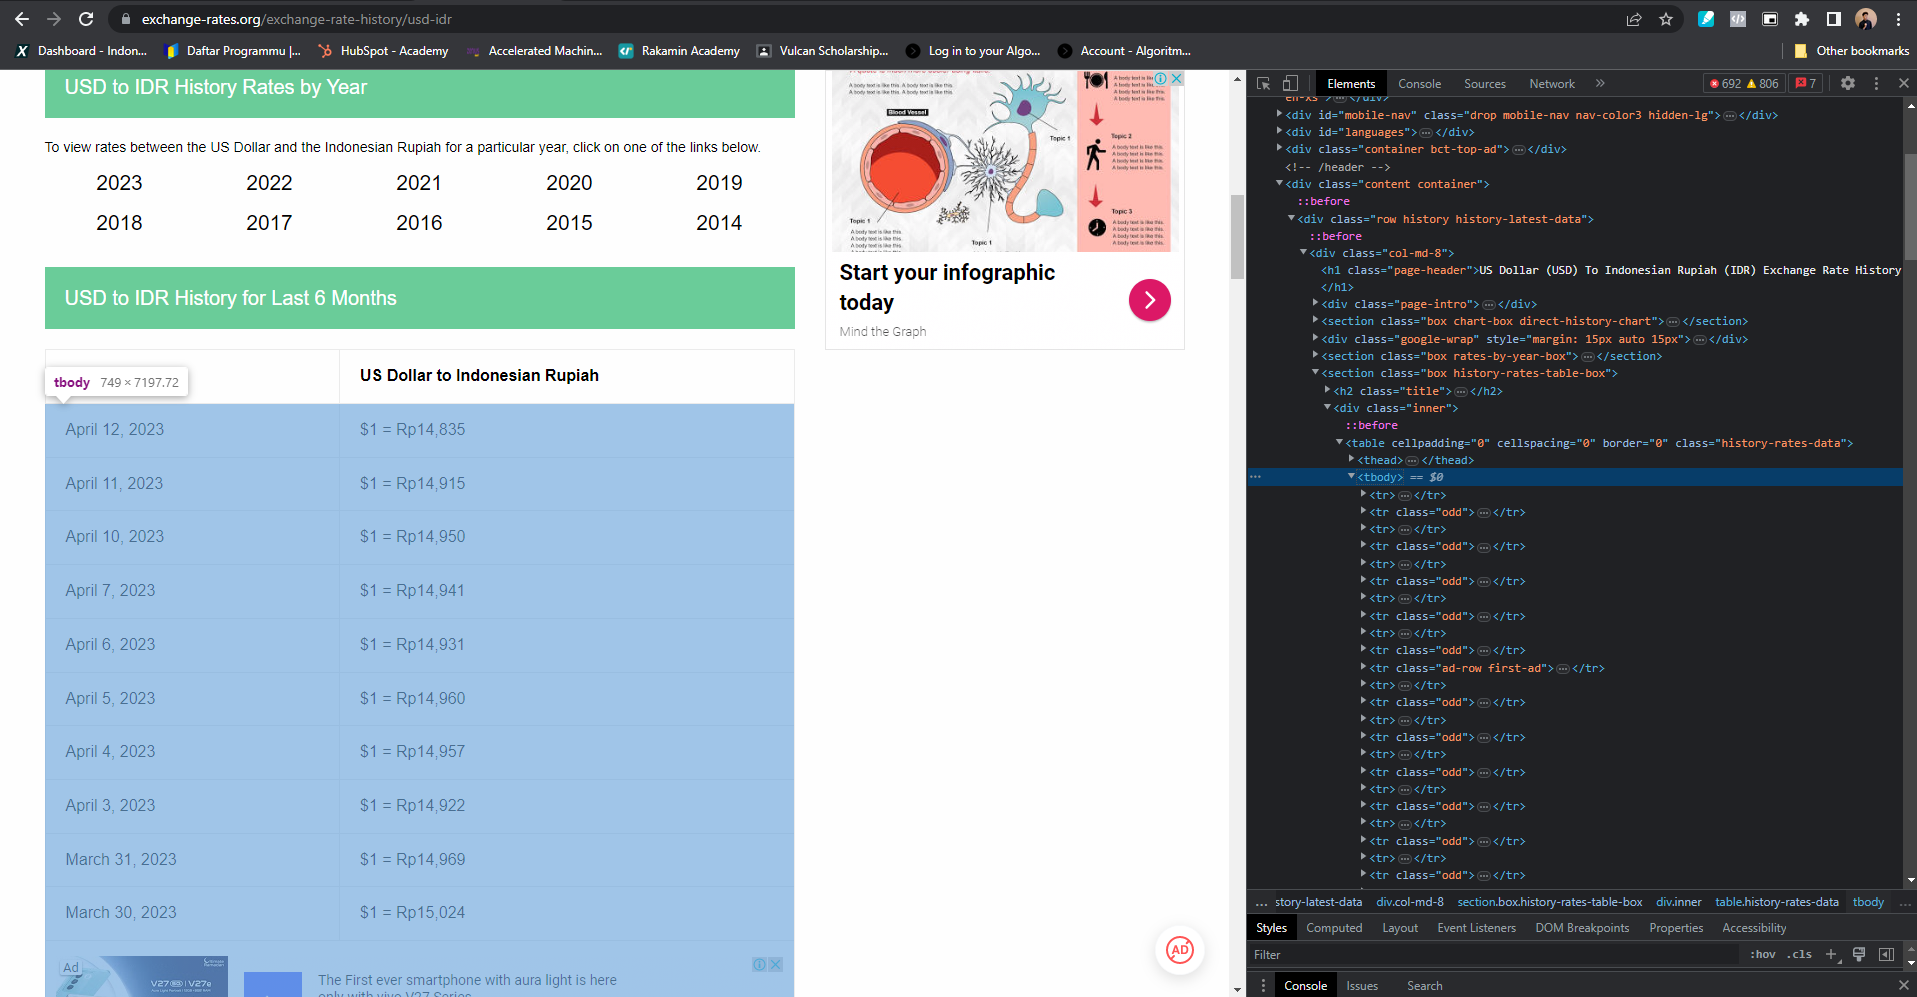

Terlihat bahwa saya dapat menggunakan baris pada tag `tbody` untuk scrapping data yang kita butuhkan.

Selanjutnya saya melakukan pencarian kata kunci yang dibutuhkan untuk dilakukan ekstraksi dengan metode `.find()` yang saya isi dengan `tbody`. Berikut tampilan konten yang saya dapatkan untuk kebutuhan scrapping saya.

In [58]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-04-14">
    April 14, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-04-14">
    2023-4-14
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     14,782
    </span>
   </span>
   <span class="n">
    <span class="nowra


Selanjutnya digunakan metode `.find_all` untuk melihat data per baris atau per periode waktu kurs rupiah terhadap dollar. Oleh karena itu dicari dua jenis tag `tr` dengan atribut yang berbeda yang terkandung pada `tbody`. Dimana data yang menunjukkan periode tiap waktu kurs rupiah terhadap dollar yaitu ditunjukkan pada tag `tr` dengan "tanpa atribut" dan dengan "atribut class: odd". Berikut merupakan penulisan kode dan hasil yang diperoleh:

In [59]:
table.find_all('tr', {'class': lambda x: x is None or 'odd' in x})[:5]

[<tr>
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-14">April 14, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-14">2023-4-14</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,782</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,782</span></span>
 </td>
 </tr>,
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-04-13">April 13, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-13">2023-4-13</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,722</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap">

Setelah mendapatkan kata kunci dan ekstraksi data yang dibutuhkan, kemudian dilakukan perhitungan jumlah data yang didapat dengan metode `len()` sebagai berikut: 

In [60]:
row = table.find_all('tr', {'class': lambda x: x is None or 'odd' in x})
row_length = len(row)
row_length

130

Setelahnya barulah dilakukan scrapping berdasarkan data yang ingin diambil yaitu tanggal dan kurs rupiah terhadap dollar dengan fungsi looping seperti di bawah ini:

In [61]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #scrapping process
    #get date     
    date = table.find_all('a', attrs={'class':'w'})[i].text
    
    #get rate
    rate = table.find_all('span', attrs={'class':'w'})[i].text

    temp.append((date, rate)) 
    
temp 

[('April 13, 2023', '$1 = Rp14,722'),
 ('April 12, 2023', '$1 = Rp14,835'),
 ('April 11, 2023', '$1 = Rp14,915'),
 ('April 10, 2023', '$1 = Rp14,950'),
 ('April 7, 2023', '$1 = Rp14,941'),
 ('April 6, 2023', '$1 = Rp14,931'),
 ('April 5, 2023', '$1 = Rp14,960'),
 ('April 4, 2023', '$1 = Rp14,957'),
 ('April 3, 2023', '$1 = Rp14,922'),
 ('March 31, 2023', '$1 = Rp14,969'),
 ('March 30, 2023', '$1 = Rp15,024'),
 ('March 29, 2023', '$1 = Rp15,034'),
 ('March 28, 2023', '$1 = Rp15,060'),
 ('March 27, 2023', '$1 = Rp15,107'),
 ('March 24, 2023', '$1 = Rp15,165'),
 ('March 23, 2023', '$1 = Rp15,085'),
 ('March 22, 2023', '$1 = Rp15,253'),
 ('March 21, 2023', '$1 = Rp15,301'),
 ('March 20, 2023', '$1 = Rp15,343'),
 ('March 17, 2023', '$1 = Rp15,375'),
 ('March 16, 2023', '$1 = Rp15,429'),
 ('March 15, 2023', '$1 = Rp15,459'),
 ('March 14, 2023', '$1 = Rp15,380'),
 ('March 13, 2023', '$1 = Rp15,416'),
 ('March 10, 2023', '$1 = Rp15,503'),
 ('March 9, 2023', '$1 = Rp15,495'),
 ('March 8, 2023',

Dari hasil yang didapatkan, dapat dimasukkan pada Dataframe pandas dan dilakukan analisis data. Namun sebelumnya data yang didapatkan masih berisi informasi terbalik sehingga saya perlu membalikkan data nya dengan menggunakan ::-1. 

In [62]:
temp = temp[::-1]
temp

[('October 17, 2022', '$1 = Rp15,441'),
 ('October 18, 2022', '$1 = Rp15,474'),
 ('October 19, 2022', '$1 = Rp15,587'),
 ('October 20, 2022', '$1 = Rp15,562'),
 ('October 21, 2022', '$1 = Rp15,537'),
 ('October 24, 2022', '$1 = Rp15,598'),
 ('October 25, 2022', '$1 = Rp15,533'),
 ('October 26, 2022', '$1 = Rp15,503'),
 ('October 27, 2022', '$1 = Rp15,560'),
 ('October 28, 2022', '$1 = Rp15,557'),
 ('October 31, 2022', '$1 = Rp15,624'),
 ('November 1, 2022', '$1 = Rp15,674'),
 ('November 2, 2022', '$1 = Rp15,685'),
 ('November 3, 2022', '$1 = Rp15,790'),
 ('November 4, 2022', '$1 = Rp15,615'),
 ('November 7, 2022', '$1 = Rp15,685'),
 ('November 8, 2022', '$1 = Rp15,638'),
 ('November 9, 2022', '$1 = Rp15,692'),
 ('November 10, 2022', '$1 = Rp15,520'),
 ('November 11, 2022', '$1 = Rp15,474'),
 ('November 14, 2022', '$1 = Rp15,554'),
 ('November 15, 2022', '$1 = Rp15,557'),
 ('November 16, 2022', '$1 = Rp15,639'),
 ('November 17, 2022', '$1 = Rp15,714'),
 ('November 18, 2022', '$1 = Rp15,

## Creating data frame & Data wrangling

Berikut merupakan hasil yang didapatkan dimasukkan dalam dataframe pandas dengan fungsi berikut:

In [88]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date', 'rate'))
df.head()

,date,rate
0,"October 17, 2022","$1 = Rp15,441"
1,"October 18, 2022","$1 = Rp15,474"
2,"October 19, 2022","$1 = Rp15,587"
3,"October 20, 2022","$1 = Rp15,562"
4,"October 21, 2022","$1 = Rp15,537"


Seperti biasa, dilakukan pengecekan tipe data yang didapatkan

In [89]:
df.dtypes

date    object
rate    object
dtype: object

Karena tipe datanya masih belum sesuai, maka perlu dilakukan konversi tipe data yang sesuai dan merubah ke format yang dapat divisualisasikan

In [90]:
#fungsi untuk mengubah format pada kolom rate
def extract_rate(rate_string):
    return rate_string.split('=')[1].strip()
df['rate'] = df['rate'].apply(extract_rate)

In [91]:
df.head()

,date,rate
0,"October 17, 2022","Rp15,441"
1,"October 18, 2022","Rp15,474"
2,"October 19, 2022","Rp15,587"
3,"October 20, 2022","Rp15,562"
4,"October 21, 2022","Rp15,537"


Selanjutnya dilakukan konversi tipe data float pada data rate, namun sebelumnya perlu mengubah "," menjadi "." dengan bantuan `str.replace()`. Dan juga dilakukan konversi tipe data datetime pada data date.

In [92]:
df['rate'] = df['rate'].str.replace('Rp', '').str.replace(",",".")
df['rate'] = df['rate'].astype('float64')
df['date'] = pd.to_datetime(df['date'])

In [93]:
df.dtypes

date    datetime64[ns]
rate           float64
dtype: object

In [94]:
df.head()

,date,rate
0,2022-10-17,15.441
1,2022-10-18,15.474
2,2022-10-19,15.587
3,2022-10-20,15.562
4,2022-10-21,15.537


Terakhir barulah dilakukan visualisasi data dengan fungsi sebagai berikut:

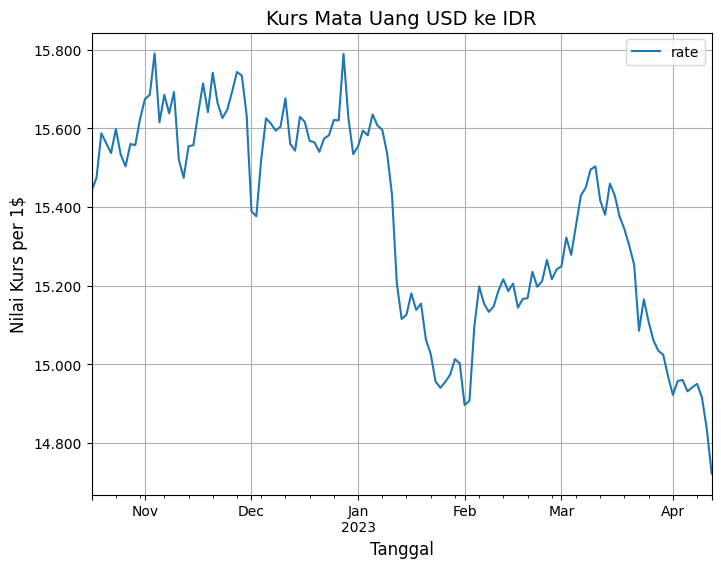

In [95]:
#Plot dari dataframe
plotkurs= df.plot(x='date', y='rate', figsize=(8, 6), grid=True)

#Menambahkan title pada plot
plt.title('Kurs Mata Uang USD ke IDR', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai Kurs per 1$', fontsize=12)

#Menampilkan plot kurs 1 USD ke IDR dengan menampilkan 3 angka di belakang koma
plotkurs.yaxis.set_major_formatter('{:.3f}'.format)

grafik=plt.show()
grafik

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

> Sudah Dilakukan

## Finishing This Notebook with Your Analysis and Conclusion

Kesimpulan 

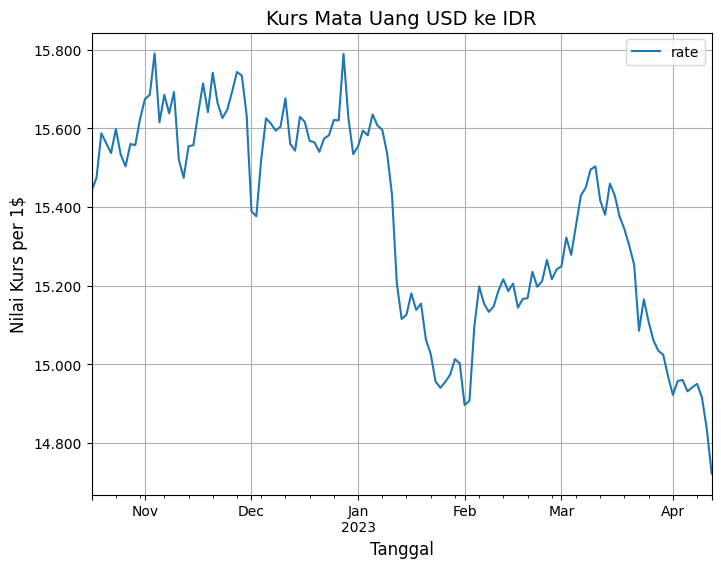

In [96]:
plotkurs= df.plot(x='date', y='rate', figsize=(8, 6), grid=True)

plt.title('Kurs Mata Uang USD ke IDR', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai Kurs per 1$', fontsize=12)

plotkurs.yaxis.set_major_formatter('{:.3f}'.format)

grafik=plt.show()
grafik

Berdasarkan hasil dari visualisasi data yang saya peroleh, didapatkan insight seperti:
1. Nilai tukar mata uang rupiah cenderung menguat ditandai dengan nilai tukar rupiah terhadap dollar yang semakin menurun per 1 US dollar.
2. Nilai tukar rupiah terhadap dollar menunjukkan nilai terendah per 1 USD pada bulan april 2023 selama 7 bulan terakhir
3. Pada awal tahun 2023 periode januari rupiah menunjukkan penguatan terhadap US dollar namun mengalami pelemahan di periode februari 2023
4. Setelah mengalami pelemahan, rupiah kembali menguat di periose selanjutnya bulan maret 2023

Selain itu, dari projek web scrapping yang sudah dilakukan, saya dapat memiliki data dari sebuah web meskipun tidak memiliki akses langsung ke data tersebut. Hal ini dilakukan dengan pengambilan data menggunakan metode scrapping yang kemudian diolah menggunakan pandas.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

> Sudah Dilakukan

Foot Note:

Mohon koreksinya jika ada kesalahan dari projek yang saya buat, mohon maaf sebelumnya jika terlambat mengumpulkan karena terdapat beberapa kendala seperti stuck dalam pengerjaan, namun pada akhirnya dapat menemukan jalan keluar dan menyelesaikannya dengan baik. Terima kasih kak atas bimbingannya